<a href="https://colab.research.google.com/github/dyaldy/TugasDataSains_Aldy_223016004/blob/main/Copy_of_Tugas_Aldy_DataSains.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. NEGARA MANA YANG MEMPUNYAI TINGKAT BUNUH DIRI TERTINGGI?**

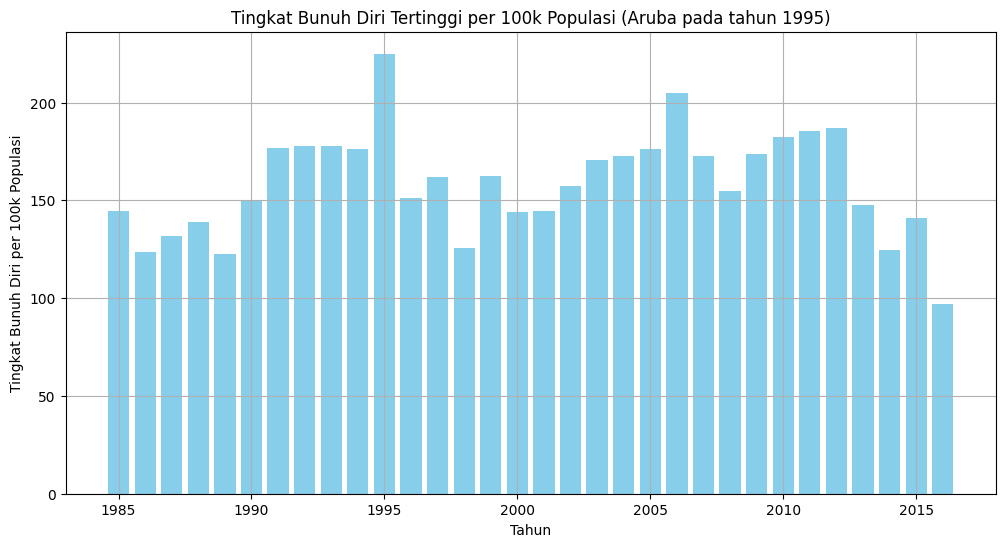

Negara dengan tingkat bunuh diri tertinggi: Aruba pada tahun 1995 dengan 224.97 per 100k populasi.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca data
data = pd.read_csv('master.csv')

# Menghapus baris yang memiliki nilai NaN di kolom 'suicides/100k pop'
data_clean = data.dropna(subset=['suicides/100k pop'])

# Mencari negara dengan tingkat bunuh diri tertinggi per tahun
highest_suicide_per_year = data_clean.groupby(['country', 'year'])['suicides/100k pop'].max().reset_index()

# Menemukan negara dengan tingkat bunuh diri tertinggi sepanjang periode data
highest_suicide = highest_suicide_per_year.loc[highest_suicide_per_year['suicides/100k pop'].idxmax()]

# Visualisasi
plt.figure(figsize=(12, 6))
plt.bar(highest_suicide_per_year['year'], highest_suicide_per_year['suicides/100k pop'], color='skyblue')
plt.title(f"Tingkat Bunuh Diri Tertinggi per 100k Populasi ({highest_suicide['country']} pada tahun {highest_suicide['year']})")
plt.xlabel('Tahun')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')
plt.grid(True)
plt.show()

# Output negara dengan tingkat bunuh diri tertinggi
print(f"Negara dengan tingkat bunuh diri tertinggi: {highest_suicide['country']} pada tahun {highest_suicide['year']} dengan {highest_suicide['suicides/100k pop']} per 100k populasi.")



**2. Pertanyaan: Bagaimana perbandingan jumlah bunuh diri antara pria dan wanita di berbagai kelompok usia?**

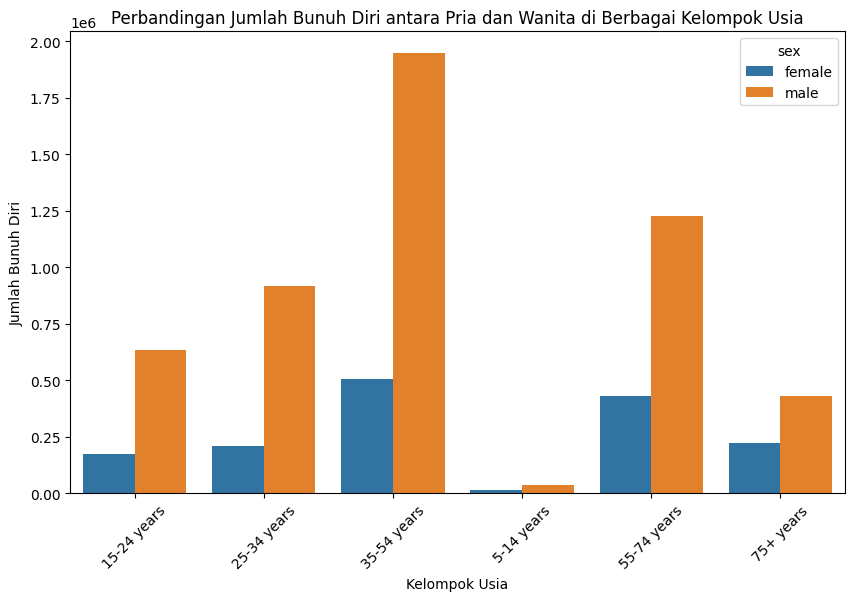

In [ ]:
import seaborn as sns

# Grupkan data berdasarkan jenis kelamin dan kelompok umur, lalu hitung jumlah bunuh diri
gender_age_group = data.groupby(['sex', 'age'])['suicides_no'].sum().reset_index()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='suicides_no', hue='sex', data=gender_age_group)
plt.title('Perbandingan Jumlah Bunuh Diri antara Pria dan Wanita di Berbagai Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Bunuh Diri')
plt.xticks(rotation=45)
plt.show()


**3. Pertanyaan: Apa korelasi antara PDB per kapita dan tingkat bunuh diri di berbagai negara?**

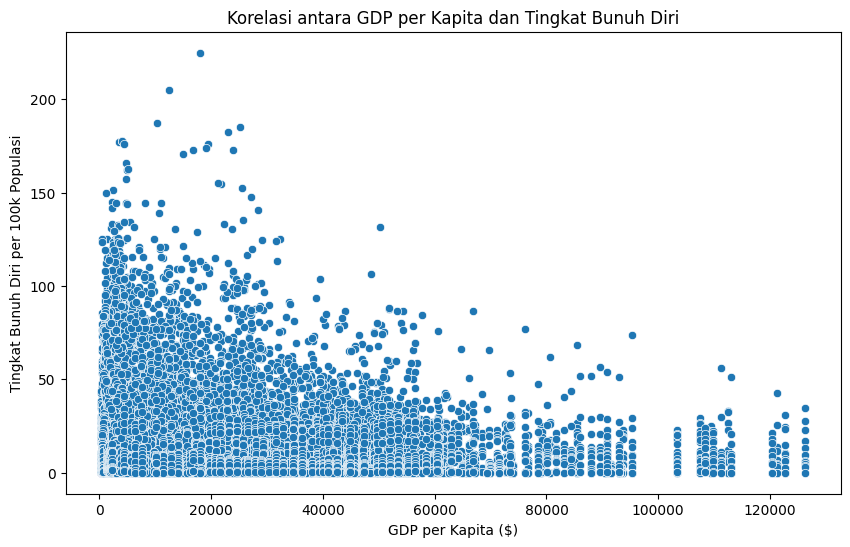

Korelasi antara GDP per kapita dan tingkat bunuh diri: 0.0017851337973441694


In [ ]:
import numpy as np

# Menghapus baris dengan nilai NaN di kolom yang relevan
data_clean_gdp = data.dropna(subset=['gdp_per_capita ($)', 'suicides/100k pop'])

# Visualisasi korelasi antara GDP per kapita dan tingkat bunuh diri
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=data_clean_gdp)
plt.title('Korelasi antara GDP per Kapita dan Tingkat Bunuh Diri')
plt.xlabel('GDP per Kapita ($)')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')
plt.show()

# Hitung korelasi
correlation = np.corrcoef(data_clean_gdp['gdp_per_capita ($)'], data_clean_gdp['suicides/100k pop'])[0, 1]
print(f"Korelasi antara GDP per kapita dan tingkat bunuh diri: {correlation}")


**4. Pertanyaan: Bagaimana jumlah bunuh diri bervariasi menurut kelompok usia dan generasi?**

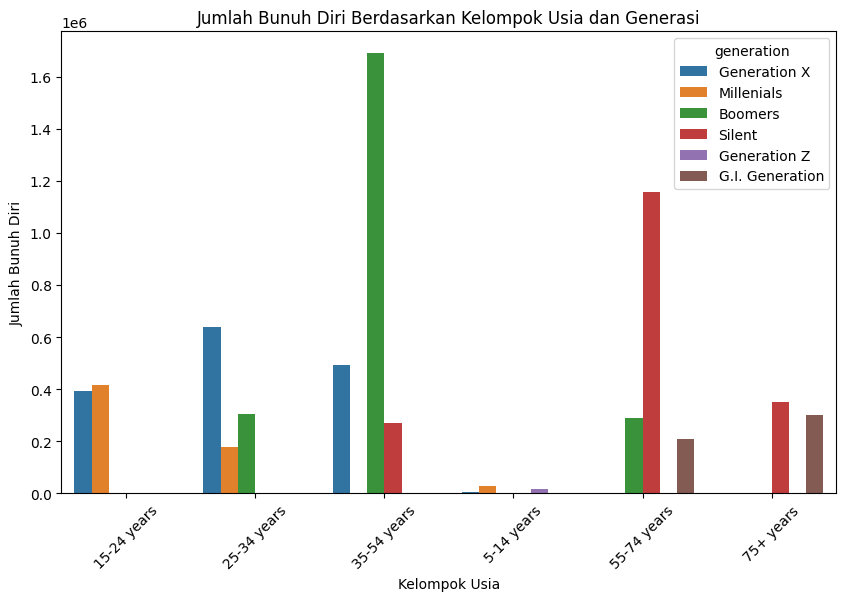

In [ ]:
# Grupkan data berdasarkan kelompok umur dan generasi, lalu hitung jumlah bunuh diri
age_generation_group = data.groupby(['age', 'generation'])['suicides_no'].sum().reset_index()

# Visualisasikan
plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='suicides_no', hue='generation', data=age_generation_group)
plt.title('Jumlah Bunuh Diri Berdasarkan Kelompok Usia dan Generasi')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Bunuh Diri')
plt.xticks(rotation=45)
plt.show()


**5. Pertanyaan: Negara mana yang memiliki peningkatan atau penurunan terbesar dalam tingkat bunuh diri dari waktu ke waktu?**

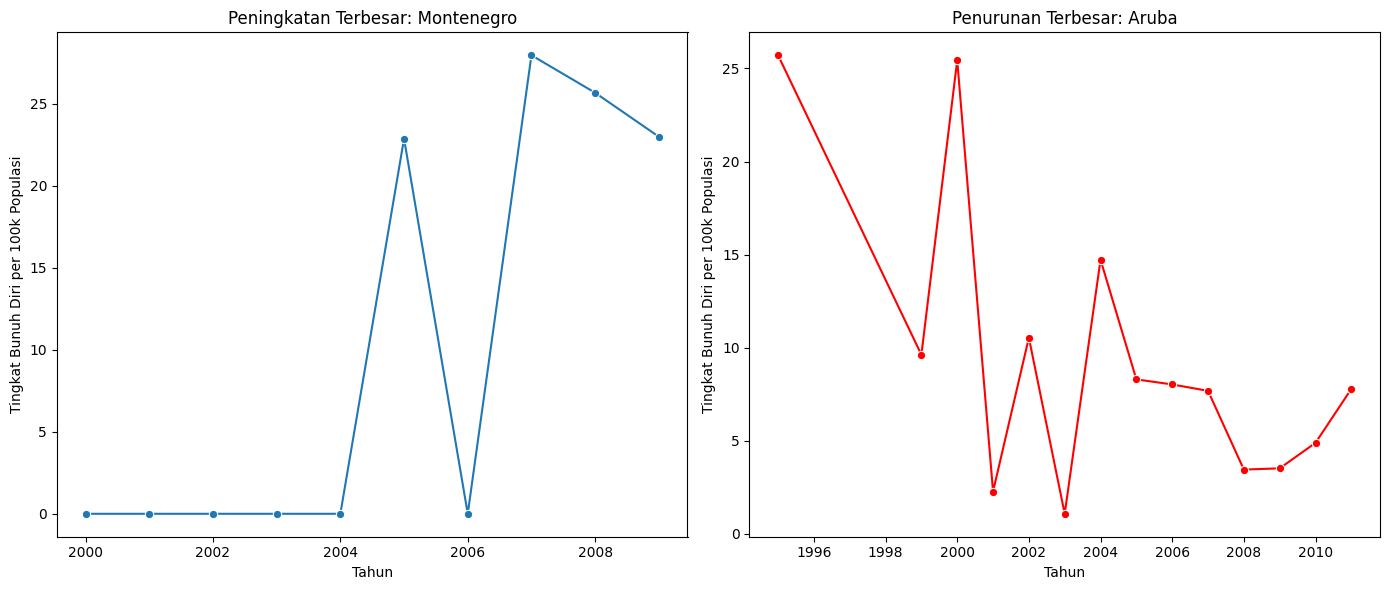

Negara dengan peningkatan terbesar dalam tingkat bunuh diri: Montenegro dari 2006 ke 2007 dengan perubahan 27.96 per 100k populasi.
Negara dengan penurunan terbesar dalam tingkat bunuh diri: Aruba dari 2000 ke 2001 dengan perubahan -23.17 per 100k populasi.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Baca data
data = pd.read_csv('master.csv')

# Menghapus baris yang memiliki nilai NaN di kolom yang relevan
data_clean = data.dropna(subset=['suicides/100k pop'])

# Grupkan data berdasarkan negara dan tahun, lalu hitung rata-rata tingkat bunuh diri per tahun
country_year_group = data_clean.groupby(['country', 'year'])['suicides/100k pop'].mean().reset_index()

# Hitung perubahan dalam tingkat bunuh diri dari tahun ke tahun
country_year_group['suicides_rate_change'] = country_year_group.groupby('country')['suicides/100k pop'].diff()

# Temukan negara dengan perubahan terbesar (baik peningkatan maupun penurunan)
max_increase = country_year_group.loc[country_year_group['suicides_rate_change'].idxmax()]
max_decrease = country_year_group.loc[country_year_group['suicides_rate_change'].idxmin()]

# Visualisasi perubahan terbesar
plt.figure(figsize=(14, 6))

# Plot untuk negara dengan peningkatan terbesar
plt.subplot(1, 2, 1)
increase_country = country_year_group[country_year_group['country'] == max_increase['country']]
sns.lineplot(x='year', y='suicides/100k pop', data=increase_country, marker="o")
plt.title(f"Peningkatan Terbesar: {max_increase['country']}")
plt.xlabel('Tahun')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')

# Plot untuk negara dengan penurunan terbesar
plt.subplot(1, 2, 2)
decrease_country = country_year_group[country_year_group['country'] == max_decrease['country']]
sns.lineplot(x='year', y='suicides/100k pop', data=decrease_country, marker="o", color='red')
plt.title(f"Penurunan Terbesar: {max_decrease['country']}")
plt.xlabel('Tahun')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')

plt.tight_layout()
plt.show()

# Output negara dengan perubahan terbesar
print(f"Negara dengan peningkatan terbesar dalam tingkat bunuh diri: {max_increase['country']} dari {max_increase['year']-1} ke {max_increase['year']} dengan perubahan {max_increase['suicides_rate_change']:.2f} per 100k populasi.")
print(f"Negara dengan penurunan terbesar dalam tingkat bunuh diri: {max_decrease['country']} dari {max_decrease['year']-1} ke {max_decrease['year']} dengan perubahan {max_decrease['suicides_rate_change']:.2f} per 100k populasi.")



**6. Bagaimana perbandingan tingkat bunuh diri antara negara dengan HDI (Indeks Pembangunan Manusia) yang berbeda?**

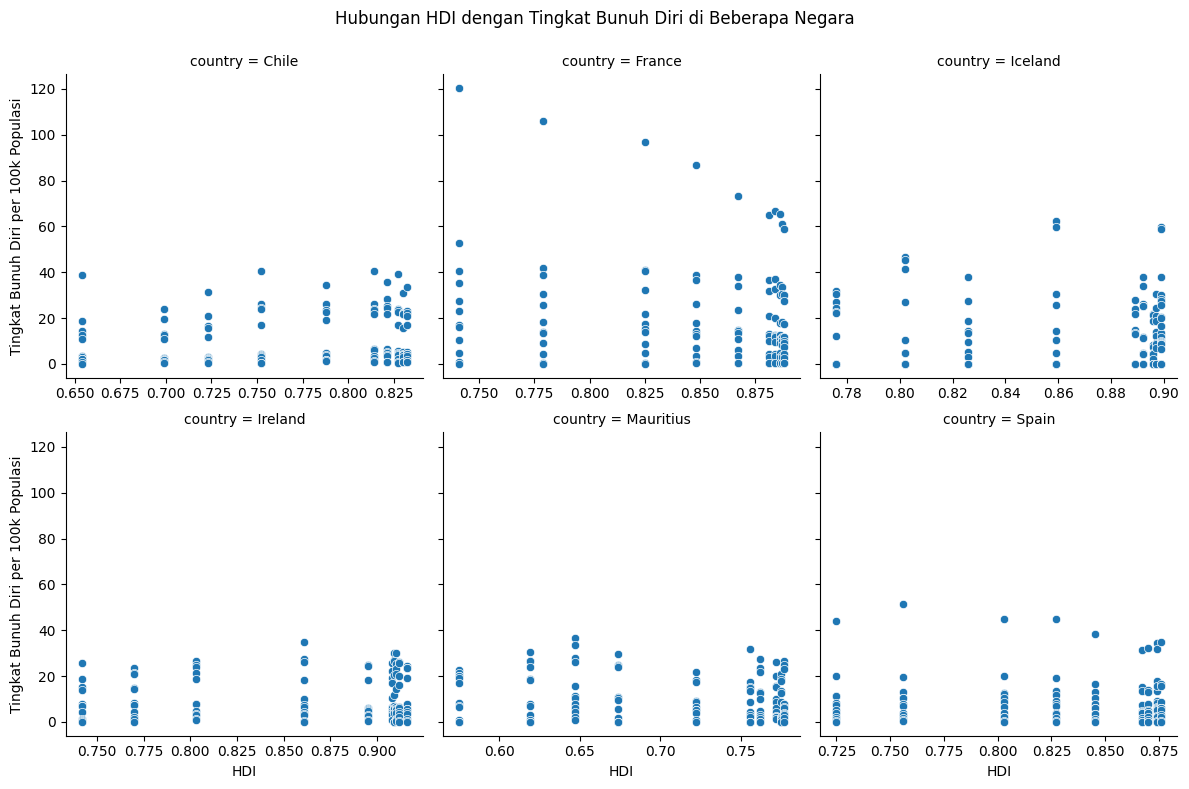

In [ ]:
# Baca data
import seaborn as sns
import matplotlib.pyplot as plt

# Menghapus baris dengan nilai NaN di kolom 'HDI for year' dan 'suicides/100k pop'
data_clean_hdi = data.dropna(subset=['HDI for year', 'suicides/100k pop'])

# Batasi negara untuk menjaga visualisasi tetap rapi (misal: 6 negara teratas berdasarkan jumlah data)
top_countries = data_clean_hdi['country'].value_counts().index[:6]
subset_data = data_clean_hdi[data_clean_hdi['country'].isin(top_countries)]

# Menggunakan FacetGrid untuk memvisualisasikan data
g = sns.FacetGrid(subset_data, col="country", col_wrap=3, height=4, sharex=False)
g.map(sns.scatterplot, "HDI for year", "suicides/100k pop")
g.set_axis_labels("HDI", "Tingkat Bunuh Diri per 100k Populasi")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Hubungan HDI dengan Tingkat Bunuh Diri di Beberapa Negara')
plt.show()


**7. Apa tren jumlah bunuh diri dari tahun ke tahun di suatu negara tertentu?**

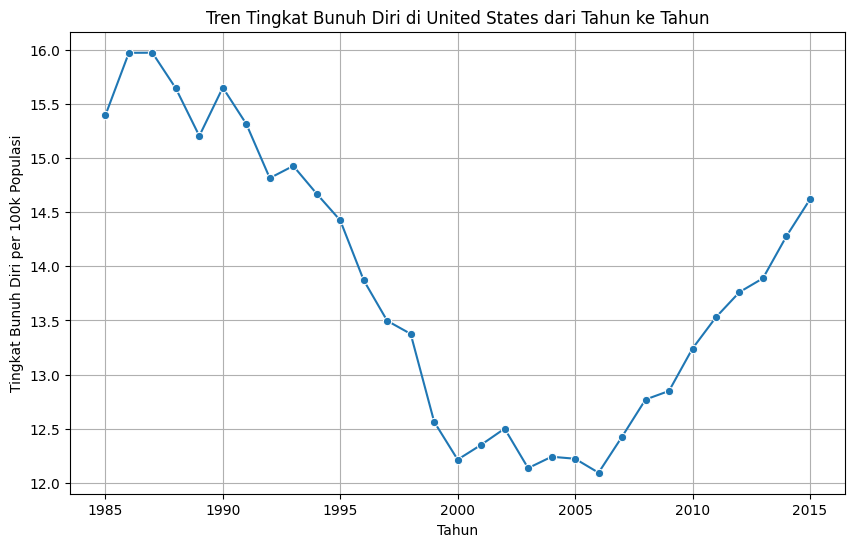

In [ ]:
# Pilih negara tertentu, misalnya 'United States'
country_data = data[data['country'] == 'United States']

# Grupkan data berdasarkan tahun dan hitung rata-rata tingkat bunuh diri
yearly_suicide_trend = country_data.groupby('year')['suicides/100k pop'].mean().reset_index()

# Visualisasi tren jumlah bunuh diri dari tahun ke tahun
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='suicides/100k pop', data=yearly_suicide_trend, marker='o')
plt.title('Tren Tingkat Bunuh Diri di United States dari Tahun ke Tahun')
plt.xlabel('Tahun')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')
plt.grid(True)
plt.show()


**8. Apakah ada perbedaan signifikan antara tingkat bunuh diri di negara maju dan negara berkembang?**

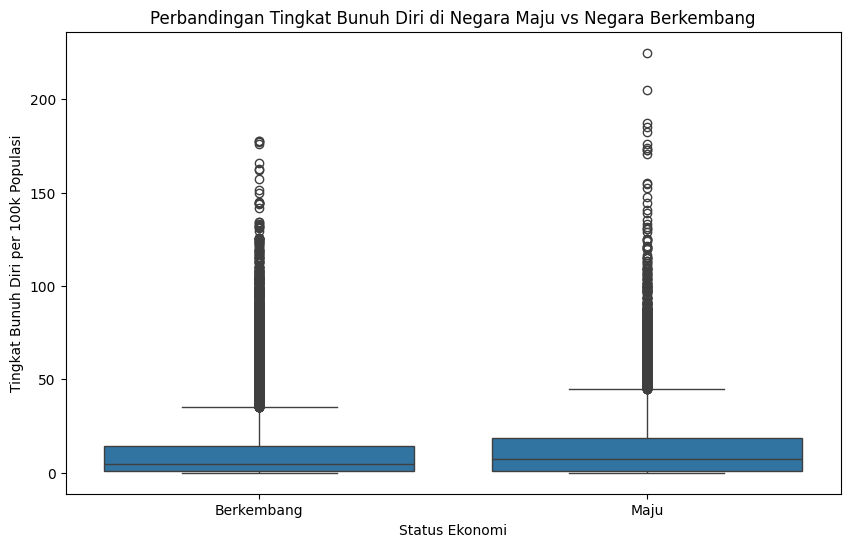

In [ ]:
# Misalkan kita menggunakan GDP per kapita sebagai proxy untuk negara maju (tinggi) dan berkembang (rendah)
# Pisahkan data menjadi negara maju dan berkembang berdasarkan gdp_per_capita
threshold_gdp = data['gdp_per_capita ($)'].median()
data['economic_status'] = ['Maju' if x >= threshold_gdp else 'Berkembang' for x in data['gdp_per_capita ($)']]

# Visualisasi tingkat bunuh diri berdasarkan status ekonomi
plt.figure(figsize=(10, 6))
sns.boxplot(x='economic_status', y='suicides/100k pop', data=data)
plt.title('Perbandingan Tingkat Bunuh Diri di Negara Maju vs Negara Berkembang')
plt.xlabel('Status Ekonomi')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')
plt.show()


**9. Bagaimana tingkat bunuh diri antar generasi (misalnya Boomers, Generation X) di berbagai negara?**

<ipython-input-14-852bfc9d4d89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='generation', y='suicides/100k pop', data=generation_suicide, palette='Set2')


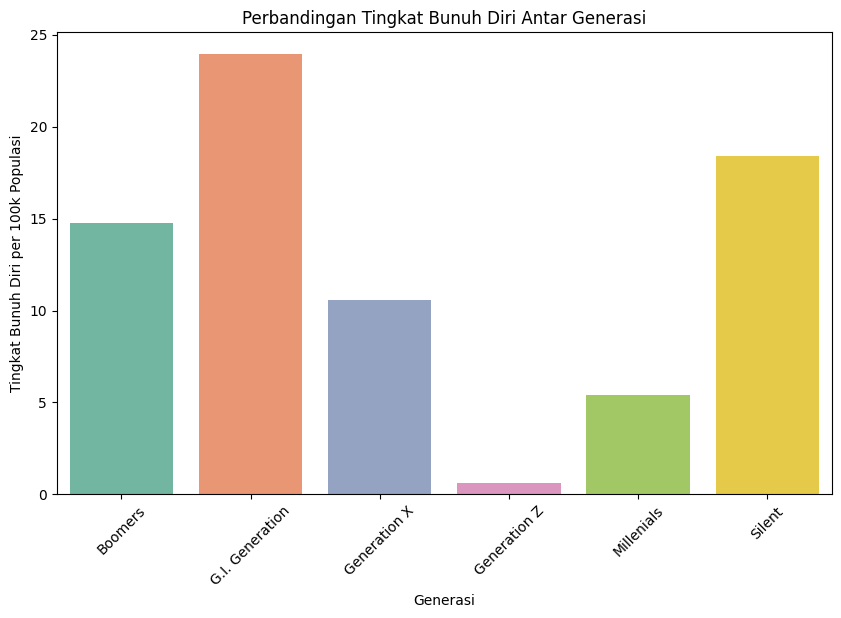

In [ ]:
# Grupkan data berdasarkan generasi dan hitung jumlah rata-rata bunuh diri
generation_suicide = data.groupby('generation')['suicides/100k pop'].mean().reset_index()

# Visualisasi tingkat bunuh diri antar generasi
plt.figure(figsize=(10, 6))
sns.barplot(x='generation', y='suicides/100k pop', data=generation_suicide, palette='Set2')
plt.title('Perbandingan Tingkat Bunuh Diri Antar Generasi')
plt.xlabel('Generasi')
plt.ylabel('Tingkat Bunuh Diri per 100k Populasi')
plt.xticks(rotation=45)
plt.show()


**10. Apa hubungan antara ukuran populasi dan jumlah total bunuh diri di suatu negara?**

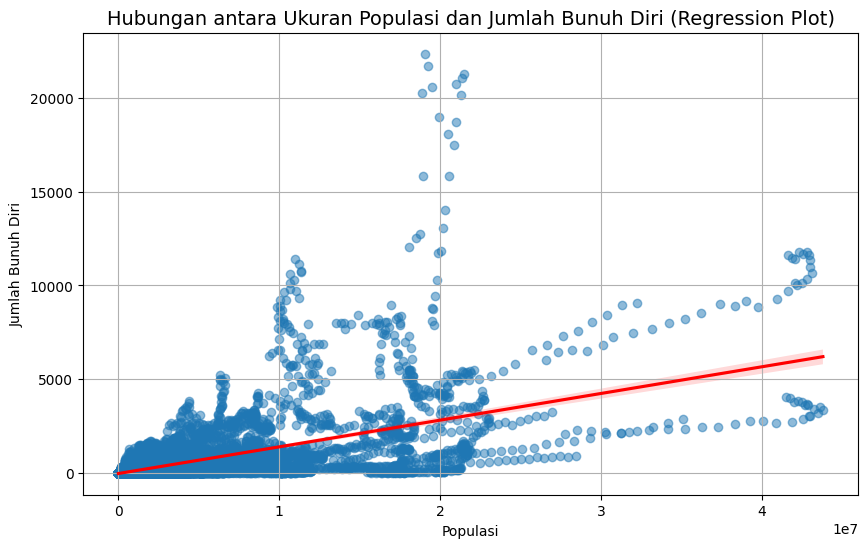

In [ ]:
import seaborn as sns

# Visualisasi menggunakan regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='population', y='suicides_no', data=data_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Hubungan antara Ukuran Populasi dan Jumlah Bunuh Diri (Regression Plot)', fontsize=14)
plt.xlabel('Populasi')
plt.ylabel('Jumlah Bunuh Diri')
plt.grid(True)
plt.show()
